# 1-1 머신러닝 분류와 강화 학습

머신러닝


*   지도 학습 - 각 데이터에 대해 정답이 존재, 입력을 적합한 출력으로 변환
*   비지도 학습 - 정답 레이블 없음, 데이터에 있는 구조 학습
*   강화 학습 - 에이전트가 환경과 상호작용하며 얻은 데이터를 바탕으로 더 많은 보상을 얻는 방법 학습



강화 학습
- 에이전트: 행동 주체
- 환경: 에이전트의 행동에 따라 보상 제공
- 목표: 보상을 극대화하는 행동 패턴 익히기

# 1-2 밴디트 문제

밴디트 문제
- 여러 슬롯머신이 있는 상황, 각 슬롯머신의 보상 분포는 다름
- 목표: 최대한 많은 코인(보상) 얻기
- 달성 요건: 가장 좋은 보상을 주는 슬롯머신 선택
- 플레이어는 각 슬롯머신의 가치를 알 수 없음 -> 추정 필요

# 1-3 밴디트 알고리즘

가치 추정 방법
- 몇 번 슬롯머신을 돌려보고 보상이 어떻게 나왔는지 평균 구하기
- 시도가 많을수록 추정치는 정확해질 것임

$Q_n = \frac{R_1 + R_2 + ... + R_n}{n}$
<br>
Q - 추정치, R - 나온 보상

In [ ]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Get average (unoptimized)
rewards = []
for n in range(1,11):
  reward = np.random.rand() #reward = 0~1
  rewards.append(reward)
  Q = np.mean(rewards)
  print(Q)

0.592581755697117
0.45627722687533545
0.37392605777202786
0.2819886472320921
0.31499470942378266
0.27278192956538305
0.32707932995753647
0.3368312171028982
0.4072551799340107
0.4536479343466008


평균 구하는 코드 최적화 (과정: p35~p36 참고) <br>
$Q_n = Q_{n-1} + \frac{1}{n}(R_n - Q_{n-1})$ <br>

In [ ]:
#Get average (optimized)
Q = 0
for n in range(1,11):
  reward = np.random.rand()
  Q = Q + (1/n)*(reward - Q)
  print(Q)

0.841340434955902
0.7880137335230096
0.6151615725744399
0.4686818253853926
0.4837377820633521
0.4287364373011392
0.40733276768468
0.4454110329018586
0.44736709208518055
0.4822826971607511


플레이어의 정책
- 탐욕 정책: 각각의 슬롯머신을 돌려보고 가장 가치 추정치가 높은 슬롯머신 정책
- 문제: 가치 추정치는 부정확하기 때문에 전적으로 신뢰할 경우 더 좋은 슬롯머신을 놓칠 수 있음
- 해결책: 플레이어의 행동은 활용과 탐색으로 나뉨, 장기적으로 더 좋은 결과
  - 활용: 지금까지의 가치 추정치를 바탕으로 가장 좋은 슬롯머신 돌리기
  - 탐색: 슬롯머신의 가치를 추정하기 위해 다양한 슬롯머신 시도


- ε-탐욕 정책: ε의 확률로 탐색, 나머지는 활용

# 1-4 밴디트 알고리즘 구현

Bandit 클래스
- 처음에 슬롯머신의 대수를 arms만큼 설정
- 슬롯머신 각각의 성공 확률을 rates에 저장

In [ ]:
class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms)
    self.arms = arms

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

  def reset(self):
    self.rates = np.random.rand(self.arms)

Agent 클래스
- epsilon - 각 행동에서 탐색을 선택할 확률
- action_size - 슬롯머신의 개수 (선택의 가짓수)
- Qs - 각 슬롯머신의 가치 추정치 저장
- ns - 각 슬롯머신을 돌린 횟수 저장
- update() - action, reward를 바탕으로 Qs, ns 갱신
- get_action() - 탐색일 경우 랜덤한 슬롯머신의 번호 리턴, 활용일 경우 가치 추정치가 가장 높은 슬롯머신의 번호 리턴

In [ ]:
class Agent:
  def __init__(self, epsilon, action_size = 10):
    self.epsilon = epsilon
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (1/self.ns[action])*(reward - self.Qs[action])

  def get_action(self):
    if np.random.rand() < self.epsilon: #explore
      return np.random.randint(len(self.Qs))
    return np.argmax(self.Qs) #exploit

  def reset(self):
    self.Qs = np.zeros(len(self.Qs))
    self.ns = np.zeros(len(self.ns))

In [ ]:
def lets_go_gambling(steps, bandit, agent):
  total_reward = 0
  total_rewards = np.zeros(steps)
  win_rate = np.zeros(steps)

  for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards[step] = total_reward
    win_rate[step] = total_reward / (step+1)

  return (total_rewards, win_rate)

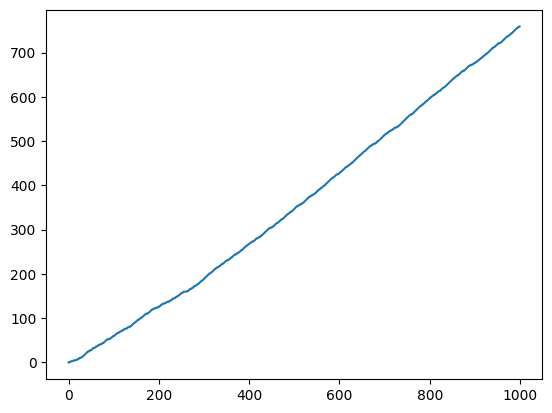

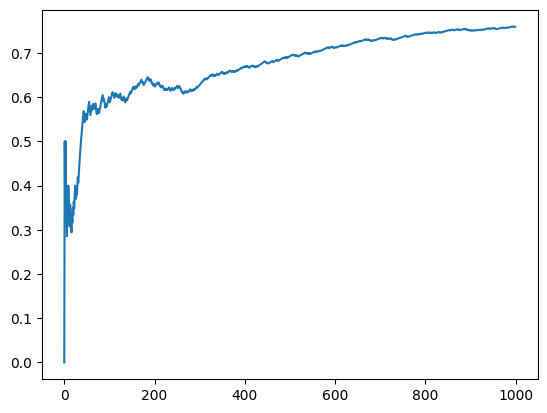

In [ ]:
tr, wr = lets_go_gambling(steps=1000, bandit = Bandit(arms=10), agent = Agent(epsilon=0.1, action_size=10))
plt.plot(tr)
plt.show()
plt.plot(wr)
plt.show()

코드에 무작위성이 있으므로, 한 번의 실험이 아닌 여러 번의 평균을 이용해야 알고리즘의 우수성을 판단할 수 있음

In [ ]:
def multiple_gambles(steps, times, bandit, agent):
  total_rewards = np.zeros(steps)
  total_win_rates = np.zeros(steps)
  for t in range(times):
    tr, wr = lets_go_gambling(steps, bandit, agent)
    total_rewards += tr
    total_win_rates += wr
    bandit.reset()
    agent.reset()

  return (total_rewards/times, total_win_rates/times)

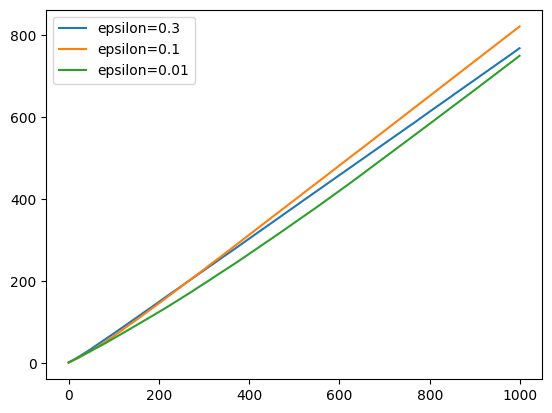

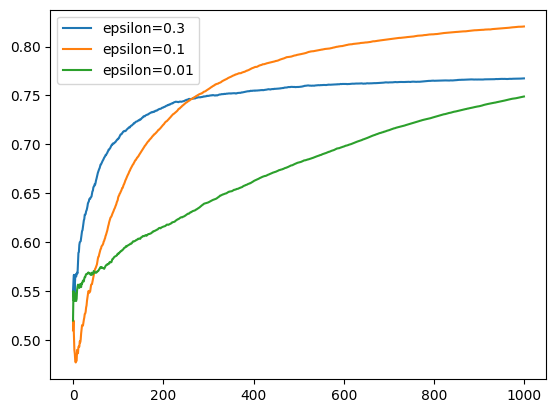

In [ ]:
tr1, wr1 = multiple_gambles(steps=1000, times=100, bandit = Bandit(arms=10), agent = Agent(epsilon=0.3, action_size=10))
tr2, wr2 = multiple_gambles(steps=1000, times=100, bandit = Bandit(arms=10), agent = Agent(epsilon=0.1, action_size=10))
tr3, wr3 = multiple_gambles(steps=1000, times=100, bandit = Bandit(arms=10), agent = Agent(epsilon=0.01, action_size=10))
plt.plot(tr1, label='epsilon=0.3')
plt.plot(tr2, label='epsilon=0.1')
plt.plot(tr3, label='epsilon=0.01')
plt.legend()
plt.show()

plt.plot(wr1, label='epsilon=0.3')
plt.plot(wr2, label='epsilon=0.1')
plt.plot(wr3, label='epsilon=0.01')
plt.legend()
plt.show()

# 1-5 비정상 문제

정상 문제: 보상의 확률 분포가 변하지 않는 문제<br>
비정상 문제: 보상의 확률 분포가 플레이 도중 변하는 문제

In [ ]:
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms)

  def play(self, arm):
    rate = self.rates[arm]
    self.rates += 0.1 * np.random.randn(self.arms) #noise
    if rate > np.random.rand():
      return 1
    else:
      return 0

  def reset(self):
    self.rates = np.random.rand(self.arms)

기존에는 모든 보상에 똑같은 가중치를 부여했었음<br>
$Q_n = \frac{1}{n}R_1 + \frac{1}{n}R_2 + ... + \frac{1}{n}R_n$<br>
그러나 비정상 문제에서는 오래된 데이터는 더 낮은 가중치, 새로운 데이터는 더 높은 가중치를 부여해야 함<br>
$Q_n = Q_{n-1} + a(R_n - Q_{n-1})\quad(0 < a < 1)$<br><br>
(기하급수적 가중치 이유 관련 내용: p.54 - p.55 참고)

In [ ]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, action_size = 10):
    self.alpha = alpha
    self.epsilon = epsilon
    self.Qs = np.zeros(action_size)

  def update(self, action, reward):
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon: #explore
      return np.random.randint(len(self.Qs))
    return np.argmax(self.Qs) #exploit

  def reset(self):
    self.Qs = np.zeros(len(self.Qs))

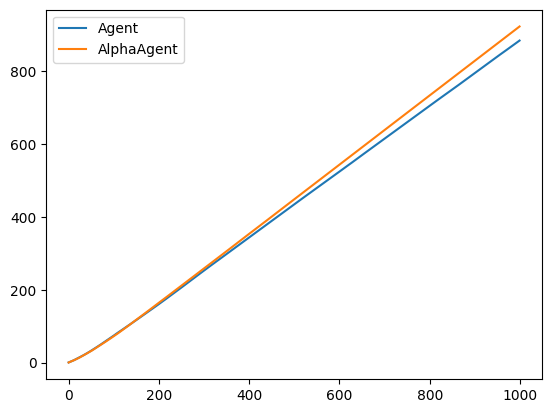

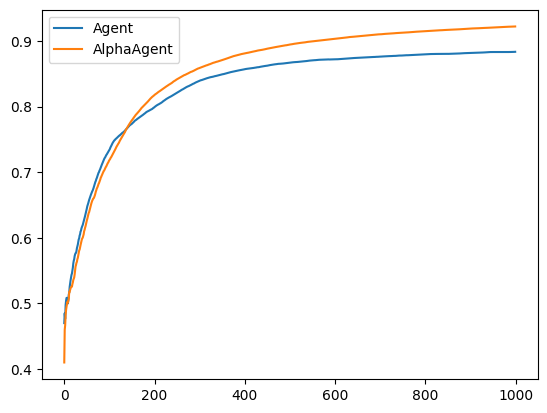

In [ ]:
tr1, wr1 = multiple_gambles(steps=1000, times=100, bandit = NonStatBandit(arms=10), agent = Agent(epsilon=0.1, action_size=10))
tr2, wr2 = multiple_gambles(steps=1000, times=100, bandit = NonStatBandit(arms=10), agent = AlphaAgent(epsilon=0.1, alpha = 0.8, action_size=10))

plt.plot(tr1, label='Agent')
plt.plot(tr2, label='AlphaAgent')
plt.legend()
plt.show()

plt.plot(wr1, label='Agent')
plt.plot(wr2, label='AlphaAgent')
plt.legend()
plt.show()